Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')
Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64
Regression model complete
Mean Squared Error: 274455221280.66
Root Mean Squared Error: 523884.74
R² Score: 0.1481

Feature Influence on Weekly Sales:
        Feature   Coefficient
1  Holiday_Flag  76321.851667
5  Unemployment -24502.350593
0         Store -15079.609530
3    Fuel_Price  -4654.770880
4           CPI  -2318.249926
2   Temperature   -761.886905


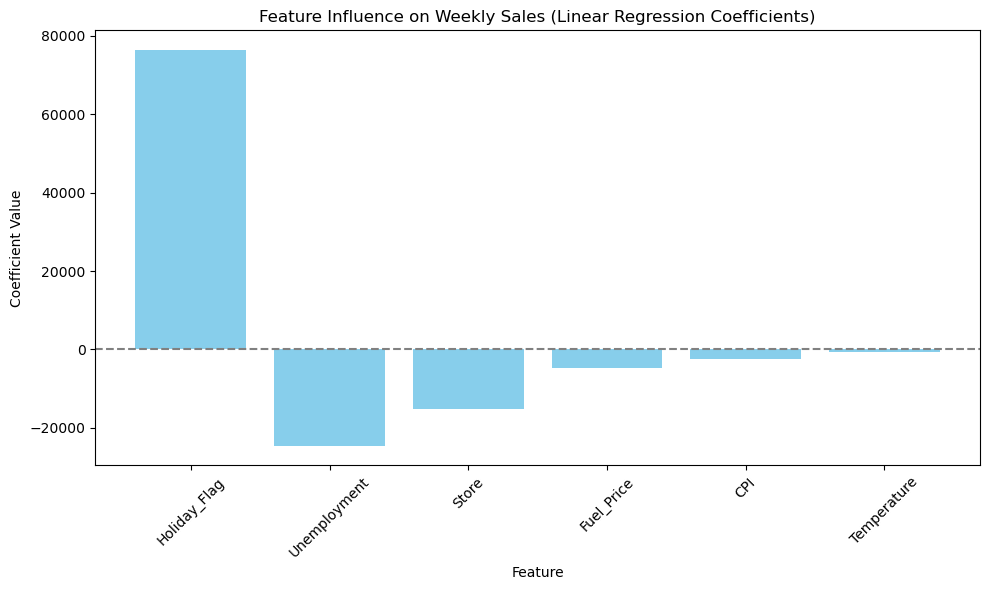

In [1]:
import pandas as pd 
import os
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

data_path = os.path.join(os.getcwd(),"..", "Data", "Walmart.csv")
df = pd.read_csv(data_path)

print(df.columns)
print(df.isnull().sum())

#If null values exist, drop them using df = df.dropna() or fill them with average using df["CPI"] = df["CPI"].fillna(df["CPI"].mean())

x = df[['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]
y = df['Weekly_Sales']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)

y_predictions = model.predict(x_test)

mse = mean_squared_error(y_test, y_predictions)
r2 = r2_score(y_test, y_predictions)
rmse = np.sqrt(mse)


print("Regression model complete")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

coef_df = pd.DataFrame({
    'Feature': x.columns,
    'Coefficient': model.coef_ 
})

coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

print("\nFeature Influence on Weekly Sales:")
print(coef_df[['Feature', 'Coefficient']])

plt.figure(figsize=(10, 6))
plt.bar(coef_df['Feature'], coef_df['Coefficient'], color='skyblue')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Feature Influence on Weekly Sales (Linear Regression Coefficients)')
plt.ylabel('Coefficient Value')
plt.xlabel('Feature')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [ ]:
#